In [1]:
!pip install datasets
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is 

In [2]:
#Loading the Xsum dataset from Hugging Face
import tensorflow as tf
from datasets import load_dataset

dataset = load_dataset("xsum")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

xsum.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


(…)SUM-EMNLP18-Summary-Data-Original.tar.gz:   0%|          | 0.00/255M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

In [3]:
import pandas as pd

#Spliting the dataset
train_data = dataset['train']
test_data = dataset['test']
val_data = dataset['validation']

#Converting the Hugging Face Dataset into a pandas Dataframe
full_train_df = pd.DataFrame(train_data)
full_test_df = pd.DataFrame(test_data)
full_val_df = pd.DataFrame(val_data)

In [4]:
full_train_df['summary'] = 'sostok ' + full_train_df['summary'] + ' eostok'
full_test_df['summary'] = 'sostok ' + full_test_df['summary'] + ' eostok'
full_val_df['summary'] = 'sostok ' + full_val_df['summary'] + ' eostok'

In [5]:
from sklearn.model_selection import train_test_split

ft_train, train_df = train_test_split(full_train_df, test_size=0.30, random_state=0)
ft_test, test_df = train_test_split(full_test_df, test_size=0.30, random_state=0)
ft_val, val_df = train_test_split(full_val_df, test_size=0.30, random_state=0)

In [6]:
display(test_df.head(5))

,document,summary,id
125,"The exhibition, From Dark to Light, explores t...",sostok A collection of paintings capturing the...,33446602
1741,Ex-French Minister for Health and Sport Rosely...,"sostok Real Madrid backed ""exemplary"" club mem...",35794268
7388,The man was once a specialist in chemical and ...,sostok A chemical weapons expert from the Isla...,35768377
1654,The duo are the first Robins players to agree ...,sostok Guernsey FC have signed Bristol City fo...,38195866
6358,The 34-year-old has recently returned from a s...,sostok Motherwell have signed Stephen Pearson ...,38842342


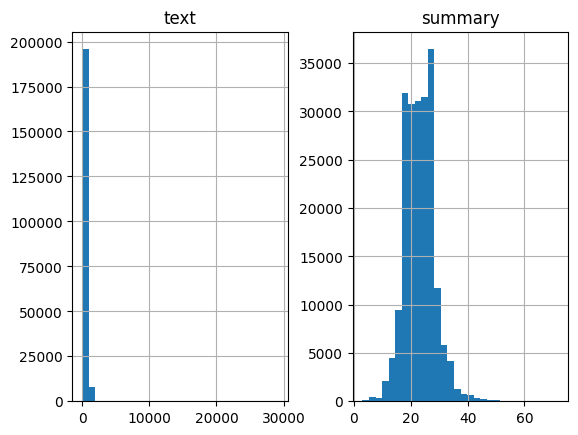

In [7]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in full_train_df['document']:
      text_word_count.append(len(i.split()))

for j in full_train_df['summary']:
      summary_word_count.append(len(j.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [8]:
import json
import os
import time
from tensorflow.keras.models import save_model
from google.colab import drive

def save_training_results(CONFIG, history, model):
    # 1. Monter Google Drive (si pas déjà fait)
    drive.mount('/content/drive', force_remount=True)  # Force le remontage si nécessaire

    # 2. Définir le chemin ABSOLU dans Google Drive
    DRIVE_ROOT = "/content/drive/MyDrive/saved_models"  # Dossier racine persistant

    # 3. Créer le dossier racine si inexistant
    os.makedirs(DRIVE_ROOT, exist_ok=True)  # Crée saved_models dans Drive si nécessaire

    # 4. Générer le chemin unique pour ce modèle
    unique_id = f"{CONFIG['name']}_{int(time.time())}"
    save_dir = os.path.join(DRIVE_ROOT, unique_id)
    os.makedirs(save_dir, exist_ok=True)  # Crée le sous-dossier unique

    # 5. Sauvegarder le modèle
    model.save(os.path.join(save_dir, "model.keras"))  # Format Keras standard

    # 6. Préparer les métriques (inchangé)
    metrics = {
        "loss": history.history["loss"][-1],
        "val_loss": history.history["val_loss"][-1],
        "accuracy": history.history["accuracy"][-1],
        "val_accuracy": history.history["val_accuracy"][-1]
    }

    # 7. Créer l'entrée JSON
    entry = {
        "model_id": unique_id,
        "config": CONFIG,
        "metrics": metrics,
        "timestamp": time.strftime("%Y-%m-%d %H:%M:%S"),
        "model_path": os.path.join(save_dir, "model.keras")
    }

    # 8. Chemin ABSOLU du fichier JSON maître
    master_json = os.path.join(DRIVE_ROOT, "training_results.json")

    # 9. Créer le fichier JSON s'il n'existe pas
    if not os.path.exists(master_json):
        with open(master_json, "w") as f:
            json.dump([], f)  # Initialise avec une liste vide

    # 10. Mettre à jour le JSON
    with open(master_json, "r+") as f:
        data = json.load(f)
        data.append(entry)
        f.seek(0)
        json.dump(data, f, indent=4)

In [9]:
#Hyperparameters
CONFIG={
  'name': "lstm_with_attention_and_es",
  'num_words_doc': 50000,
  'num_words_sum': 10000,
  'max_doc_length': 600,
  'max_sum_length': 40,
  'embedding_dim': 128,
  'lstm_units': 200,
  'learning_rate': 0.001,
  'nb_batch': 64,
  'nb_epochs': 10,
}

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization des documents et résumés [2][4]
tokenizer_doc = Tokenizer(CONFIG['num_words_doc'], oov_token='<OOV>')
tokenizer_sum = Tokenizer(CONFIG['num_words_sum'], oov_token='<OOV>')

tokenizer_doc.fit_on_texts(list(train_df['document']))
tokenizer_sum.fit_on_texts(list(train_df['summary']))

In [12]:
#Training set padding
x_train_seq = tokenizer_doc.texts_to_sequences(train_df['document'])
x_train_pad = pad_sequences(x_train_seq, maxlen=CONFIG['max_doc_length'], padding='post', truncating='post')

y_train_seq = tokenizer_sum.texts_to_sequences(train_df['summary'])
y_train_pad = pad_sequences(y_train_seq, maxlen=CONFIG['max_sum_length'], padding='post', truncating='post')

#Validation set padding
x_val_seq = tokenizer_doc.texts_to_sequences(val_df['document'])
x_val_pad = pad_sequences(x_val_seq, maxlen=CONFIG['max_doc_length'], padding='post', truncating='post')

y_val_seq = tokenizer_sum.texts_to_sequences(val_df['summary'])
y_val_pad = pad_sequences(y_val_seq, maxlen=CONFIG['max_sum_length'], padding='post', truncating='post')

In [13]:
doc_voc = tokenizer_doc.num_words + 1
sum_voc = tokenizer_sum.num_words + 1

In [14]:
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate, Dot, Activation
from tensorflow.keras.models import Model
import tensorflow as tf

# 1. Encoder
encoder_inputs = Input(shape=(CONFIG['max_doc_length'],))
enc_emb = Embedding(doc_voc, CONFIG['embedding_dim'], mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(CONFIG['lstm_units'], return_sequences=True, return_state=True, use_cudnn=False)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# 2. Decoder
decoder_inputs = Input(shape=(CONFIG['max_sum_length']-1,))
dec_emb_layer = Embedding(sum_voc, CONFIG['embedding_dim'], mask_zero=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(CONFIG['lstm_units'], return_sequences=True, return_state=True, use_cudnn=False)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 3. Bahdanau Attention
# Score function (dot product attention)
score = Dot(axes=[2, 2])([decoder_outputs, encoder_outputs])  # shape: (batch_size, target_seq_len, input_seq_len)
attention_weights = Activation('softmax', name='attention_weights')(score)  # softmax over encoder time steps
context_vector = Dot(axes=[2, 1])([attention_weights, encoder_outputs])  # weighted sum over encoder outputs

# 4. Concat context vector + decoder output
decoder_combined_context = Concatenate(axis=-1)([context_vector, decoder_outputs])

# 5. Final output
output_dense = Dense(CONFIG['lstm_units'], activation="tanh")(decoder_combined_context)
decoder_dense = Dense(sum_voc, activation='softmax')
outputs = decoder_dense(output_dense)

# Final model
model = Model([encoder_inputs, decoder_inputs], outputs)

In [15]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 600)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 39)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 600, 128)  │  6,400,128 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 600)       │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 39, 128)   │  1,280,128 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 600,      │    263,200 │ embedding[0][0],  │
│                     │ 200), (None,      │            │ not_equal[0][0]   │
│                     │ 200), (None,      │            │                   │
│                     │ 200)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 39, 200), │    263,200 │ embedding_1[0][0… │
│                     │ (None, 200),      │            │ lstm[0][1],       │
│                     │ (None, 200)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 39, 600)   │          0 │ lstm_1[0][0],     │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weights   │ (None, 39, 600)   │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_1 (Dot)         │ (None, 39, 200)   │          0 │ attention_weight… │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 39, 400)   │          0 │ dot_1[0][0],      │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 39, 200)   │     80,200 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 39, 10001) │  2,010,201 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,297,057 (39.28 MB)

 Trainable params: 10,297,057 (39.28 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

# Compilation [4]
model.compile(
    optimizer=Adam(learning_rate=CONFIG['learning_rate']),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entraînement
history = model.fit(
    [x_train_pad, y_train_pad[:,:-1]],
    y_train_pad[:, 1:],
    batch_size=CONFIG['nb_batch'],
    epochs=CONFIG['nb_epochs'],
    callbacks = [es],
    validation_data=([x_val_pad, y_val_pad[:, :-1]], y_val_pad[:, 1:])
)

Epoch 1/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 134s 132ms/step - accuracy: 0.4661 - loss: 4.2059 - val_accuracy: 0.5384 - val_loss: 3.1012
Epoch 2/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 134s 128ms/step - accuracy: 0.5445 - loss: 3.0017 - val_accuracy: 0.5598 - val_loss: 2.7807
Epoch 3/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 141s 128ms/step - accuracy: 0.5652 - loss: 2.7100 - val_accuracy: 0.5730 - val_loss: 2.6190
Epoch 4/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 144s 130ms/step - accuracy: 0.5782 - loss: 2.5311 - val_accuracy: 0.5801 - val_loss: 2.5139
Epoch 5/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.5891 - loss: 2.3904 - val_accuracy: 0.5862 - val_loss: 2.4480
Epoch 6/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.5980 - loss: 2.2799 - val_accuracy: 0.5884 - val_loss: 2.4074
Epoch 7/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.6059 - loss: 2.1863 - val_accuracy: 0.5914 - val_loss: 2.3826
Epoch 8/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 140s 129ms/step - accuracy: 0.6150 -

In [18]:
save_training_results(CONFIG, history, model)

Mounted at /content/drive


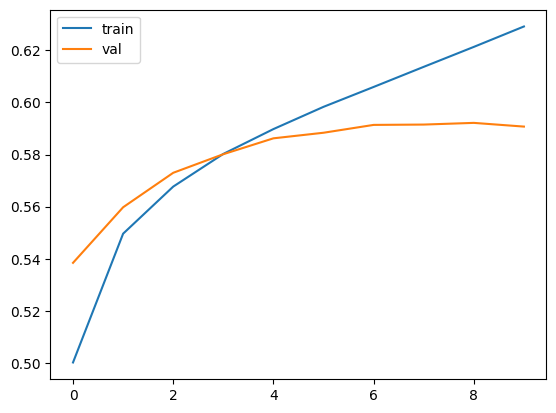

In [20]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
!pip install rouge_score
!pip install bert_score
!pip install tensorflow-text

In [21]:
reverse_target_word_index=tokenizer_sum.index_word
reverse_source_word_index=tokenizer_doc.index_word
target_word_index=tokenizer_sum.word_index

In [23]:
# Encode the input sequence to get the feature vector
encoder_model_inf = Model(encoder_inputs, [encoder_outputs, state_h, state_c])

# Inputs pour un pas de décodage
decoder_state_input_h = Input(shape=(CONFIG['lstm_units'],))
decoder_state_input_c = Input(shape=(CONFIG['lstm_units'],))
encoder_outputs_inf = Input(shape=(CONFIG['max_doc_length'], CONFIG['lstm_units']))

# Embedding du token courant
dec_input = Input(shape=(1,))  # On prédit un mot à la fois
dec_emb2 = dec_emb_layer(dec_input)

# LSTM avec états initiaux
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# Attention
score = Dot(axes=[2, 2])([decoder_outputs2, encoder_outputs_inf])
attention_weights = Activation('softmax')(score)
context_vector = Dot(axes=[2, 1])([attention_weights, encoder_outputs_inf])

# Fusion context + output
decoder_combined_context = Concatenate(axis=-1)([context_vector, decoder_outputs2])
output_dense = Dense(CONFIG['lstm_units'], activation="tanh")(decoder_combined_context)
decoder_outputs2 = decoder_dense(output_dense)

# Modèle d’inférence du décodeur
decoder_model_inf = Model(
    [dec_input, encoder_outputs_inf, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2, state_h2, state_c2]
)

In [24]:
# Préparer l'input_seq pour le modèle d'inférence
def prepare_input_seq(document):
    # Tokeniser le document
    input_seq = tokenizer_doc.texts_to_sequences([document])

    # Paddé pour que toutes les séquences aient la même longueur
    input_seq = pad_sequences(input_seq, maxlen=CONFIG['max_doc_length'], padding='post', truncating='post')

    return input_seq

In [27]:
import numpy as np

def decode_sequence(input_seq):
    # Encode the input as state vectors
    encoder_out, state_h, state_c = encoder_model_inf.predict(input_seq)
    start_token_idx = tokenizer_sum.word_index['sostok']
    end_token_idx = tokenizer_sum.word_index['eostok']

    # Initialize target sequence with only the start token
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = start_token_idx

    decoded_sentence = []

    for _ in range(CONFIG['max_sum_length']):
        # Predict next word
        output_tokens, h, c = decoder_model_inf.predict([target_seq, encoder_out, state_h, state_c])

        # Take the most probable word index
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer_sum.index_word.get(sampled_token_index, '')

        # Stop condition
        if sampled_token_index == end_token_idx or sampled_word == '':
            break

        decoded_sentence.append(sampled_word)

        # Update target sequence (next input is current output)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        state_h, state_c = h, c

    return ' '.join(decoded_sentence)

In [28]:
seq = prepare_input_seq(train_df['document'][20])
generated = decode_sequence(seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


ValueError: Layer "functional_4" expects 4 input(s), but it received 3 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(1, 1) dtype=float32>, <tf.Tensor 'data_1:0' shape=(1, 200) dtype=float32>, <tf.Tensor 'data_2:0' shape=(1, 200) dtype=float32>]

In [ ]:
display(train_df['document'][20])
display(train_df['summary'][20])

'The decision comes after 170,000 activists from around the world demanded action to help lesbians targeted for "corrective rape".\nThe authorities have been accused of not doing enough following the recent killing and rape of lesbian activist Noxolo Nogwaza.\nPolice say they do not consider sexual orientation when investigating murder.\n"To us, murder is murder, whether somebody is Zulu, English, male or female - we don\'t see colour, we don\'t see gender," police ministry spokesman Zweli Mnisi told the BBC on Tuesday, after rights groups urged the police to do more to find those responsible Ms Nogwaza\'s death.\nShe was stoned, stabbed and gang-raped in the KwaThema township east of Johannesburg over the Easter weekend.\nUnlike in many African countries, homosexual acts are legal in South Africa and discrimination based on sexual orientation is banned, but activists say gay and lesbian people are often attacked in townships.\nThey say "corrective rape" - when a lesbian is raped to ei

'sostok South Africa is to set up a team to tackle hate crimes against gay people, the justice ministry says. eostok'

In [ ]:
generated

'the us of the us government has been charged with a man in a crash in the death of a court'